In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np

from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 18

## I. Load data

In [2]:
dirname = globals()['_dh'][0]
path_region = os.path.join(dirname, '../data', 'region-based_data/')
path_field = os.path.join(dirname, '../data', 'field-based_data/')

asia = pd.read_csv(path_region + 'summary_asia_randoms.csv')
europe = pd.read_csv(path_region + 'summary_europe_randoms.csv')
north_america = pd.read_csv(path_region + 'summary_north_america_randoms.csv')

ml = pd.read_csv(path_field + 'summary_ml_randoms.csv')
ct = pd.read_csv(path_field + 'summary_comtheo_randoms.csv')
wl = pd.read_csv(path_field + 'summary_wireless_randoms.csv')

## II. Process data

### 1. Feature engineering: bins, diff, pdiff

In [3]:
def add_bin_col(df, column_name, bin_size):
    bins = list(range(df[column_name].min(), df[column_name].max()+bin_size, bin_size))
    df['bins_{}'.format(column_name)] = pd.cut(df[column_name].astype(int), bins, right=False)

def add_diff_col(df, out_col, old_col, new_col):
    df[out_col] = df.apply(lambda x: x[old_col] - x[new_col], axis=1)

def add_pdiff_col(df, out_col, new_col, old_col):
    df[out_col] = df.apply(lambda x: x[new_col]/x[old_col]*100. if x[old_col] !=0 else 0, axis=1)

In [4]:
datasets = [asia, europe, north_america, ml, wl, ct]

for df in datasets:
    add_diff_col(df, 'diff_tech_hindex', 'org_h_index', 'tech_h_index')
    add_pdiff_col(df, 'pdiff_tech_hindex', 'diff_tech_hindex', 'org_h_index')
    add_pdiff_col(df, 'pdiff_tech_cits', 'nontech_est_cits', 'est_cits')

add_bin_col(asia, 'org_h_index', 5)
add_bin_col(europe, 'org_h_index', 5)
add_bin_col(north_america, 'org_h_index', 5)

add_bin_col(asia, 'est_cits', 1000)
add_bin_col(europe, 'est_cits', 1000)
add_bin_col(north_america, 'est_cits', 1000)

add_bin_col(ml, 'org_h_index', 5)
add_bin_col(ct, 'org_h_index', 5)
add_bin_col(wl, 'org_h_index', 5)

add_bin_col(ml, 'est_cits', 1000)
add_bin_col(ct, 'est_cits', 1000)
add_bin_col(wl, 'est_cits', 1000)

asia['tech_est_cits'] = asia.apply(lambda x: x['est_cits'] - x['nontech_est_cits'], axis=1)
europe['tech_est_cits'] = europe.apply(lambda x: x['est_cits'] - x['nontech_est_cits'], axis=1)
north_america['tech_est_cits'] = north_america.apply(lambda x: x['est_cits'] - x['nontech_est_cits'], axis=1)

### 2. Concat datasets by regions, fields

In [5]:
all_regions = pd.concat([asia, europe, north_america], axis=0)
all_fields = pd.concat([ml, ct, wl], axis=0)

In [6]:
all_regions.head(1)

,id,name,affiliation,sampled_type,pubs_count,est_cits,journal_pubs_count,conference_pubs_count,nontech_pubs_count,journal_est_cits,conference_est_cits,nontech_est_cits,org_h_index,tech_h_index,diff_tech_hindex,pdiff_tech_hindex,pdiff_tech_cits,bins_org_h_index,bins_est_cits,tech_est_cits
0,2306406627,Hua-Jie Wang,Shanghai Jiao Tong University,asia_randoms,11,881,11,0,0,881,0,0,8,8,0,0.0,0.0,"[5, 10)","[0, 1000)",881


In [7]:
all_fields.head(1)

,id,name,affiliation,sampled_type,pubs_count,est_cits,journal_pubs_count,conference_pubs_count,nontech_pubs_count,journal_est_cits,conference_est_cits,nontech_est_cits,org_h_index,tech_h_index,infield_pubs_count,infield_est_cits,infield_h_index,diff_tech_hindex,pdiff_tech_hindex,pdiff_tech_cits,bins_org_h_index,bins_est_cits
0,2793852895,Norman R Williams,University College London,ml_randoms,11,25,1,1,0,25,0,0,1,1,1,0,0,0,0.0,0.0,"[0, 5)","[0, 1000)"


## III. Visualization

### A. Region-based

### 1. Distribution

#### 1.1. H-Index

In [72]:
import numpy as np

np.quantile(all_regions['org_h_index'], [0.17, 0.61, 0.74, 0.80, 0.84, 0.98])

array([ 0.,  1.,  2.,  3.,  4., 20.])

In [84]:
np.quantile(asia['org_h_index'], [0.65, 0.74, 0.80, 0.84, 0.993])

array([ 1.   ,  2.   ,  3.   ,  3.   , 20.042])

In [82]:
np.quantile(north_america['org_h_index'], [0.59, 0.74, 0.80, 0.84, 0.98])

array([ 1.,  3.,  3.,  4., 20.])

In [89]:
np.quantile(europe['org_h_index'], [0.58, 0.74, 0.80, 0.84, 0.968])

array([ 1.   ,  3.   ,  4.   ,  6.   , 20.096])

- Original H-Index of 3 regions

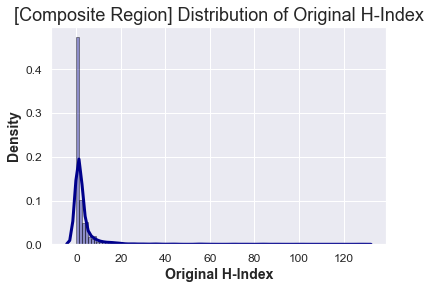

In [6]:
# fig = plt.figure(figsize=(15,10))
fig = plt.figure()
sns.distplot(all_regions['org_h_index'], hist=True, kde=True, 
             bins=int(len(all_regions['org_h_index'])/30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.xlabel('Original H-Index')
plt.ylabel('Density')
plt.title('[Composite Region] Distribution of Original H-Index')
fig.savefig('../images/OrgHIndex_Distribution_AllRegions.png', dpi=300)

- New H-Index 3 regions

Text(0.5, 1.0, 'Distribution of New H-Index (Excluded Survey and Magazine) in All Continents')

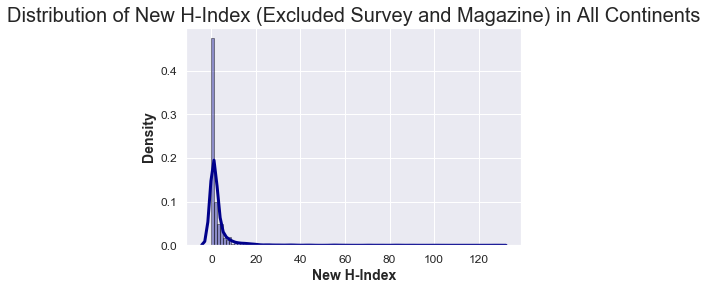

In [8]:
fig = plt.figure(figsize=(15,10))
sns.distplot(all_regions['tech_h_index'], hist=True, kde=True, 
             bins=int(len(all_regions['tech_h_index'])/30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.xlabel('New H-Index')
plt.ylabel('Density')
plt.title('Distribution of New H-Index (Excluded Survey and Magazine) in All Continents')
# fig.savefig('../images/NewHIndex_Distribution_AllRegions.png', dpi=300)

- Original H-Index each region

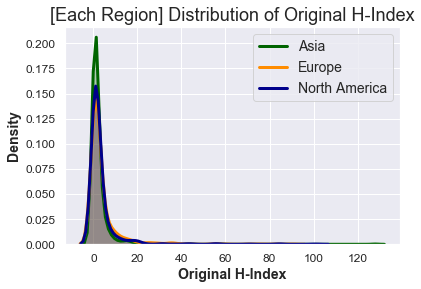

In [7]:
# fig = plt.figure(figsize=(15,10))
fig = plt.figure()
sns.distplot(asia['org_h_index'], hist = False, kde = True, color = 'darkgreen', 
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Asia')
sns.distplot(europe['org_h_index'], hist = False, kde = True, color = 'darkorange',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Europe')
sns.distplot(north_america['org_h_index'], hist = False, kde = True, color = 'darkblue',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'North America')
plt.xlabel('Original H-Index')
plt.ylabel('Density')
plt.title('[Each Region] Distribution of Original H-Index')
fig.savefig('../images/OrgHIndex_Distribution_EachRegion.png', dpi=300)

- New H-Index each region

Text(0.5, 1.0, 'Distribution of New H-Index (Excluded Survey and Magazine) in Each Continent')

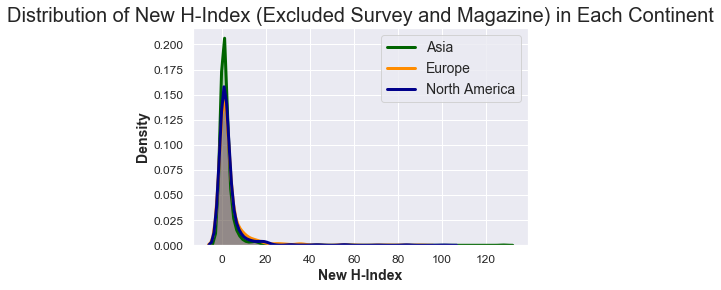

In [10]:
fig = plt.figure(figsize=(15,10))
sns.distplot(asia['tech_h_index'], hist = False, kde = True, color = 'darkgreen', 
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Asia')
sns.distplot(europe['tech_h_index'], hist = False, kde = True, color = 'darkorange',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Europe')
sns.distplot(north_america['tech_h_index'], hist = False, kde = True, color = 'darkblue',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'North America')
plt.xlabel('New H-Index')
plt.ylabel('Density')
plt.title('Distribution of New H-Index (Excluded Survey and Magazine) in Each Continent')
# fig.savefig('../images/NewHIndex_Distribution_RegionBased.png', dpi=300)

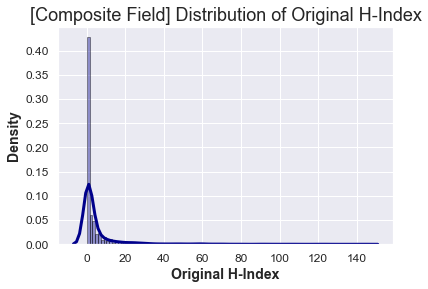

In [8]:
# fig = plt.figure(figsize=(15,10))
fig = plt.figure()
sns.distplot(all_fields['org_h_index'], hist=True, kde=True, 
             bins=int(len(all_fields['org_h_index'])/30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.xlabel('Original H-Index')
plt.ylabel('Density')
plt.title('[Composite Field] Distribution of Original H-Index')
fig.savefig('../images/OrgHIndex_Distribution_AllFields.png', dpi=300)

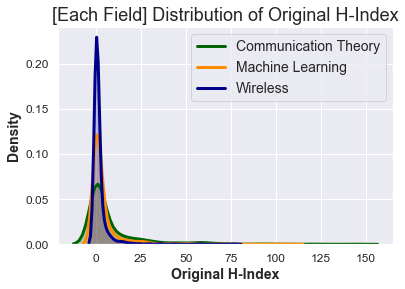

In [9]:
# fig = plt.figure(figsize=(15,10))
fig = plt.figure()
sns.distplot(ct['org_h_index'], hist = False, kde = True, color = 'darkgreen', 
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Communication Theory')
sns.distplot(ml['org_h_index'], hist = False, kde = True, color = 'darkorange',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Machine Learning')
sns.distplot(wl['org_h_index'], hist = False, kde = True, color = 'darkblue',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Wireless')
plt.xlabel('Original H-Index')
plt.ylabel('Density')
plt.title('[Each Field] Distribution of Original H-Index')
fig.savefig('../images/OrgHIndex_Distribution_EachField.png', dpi=300)

In [17]:
np.quantile(all_fields['org_h_index'], [0.62, 0.936])

array([ 1., 20.])

In [31]:
np.quantile(wl['org_h_index'], [0.69, 0.989])

array([ 1.   , 20.055])

In [49]:
np.quantile(ml['org_h_index'], [0.609, 0.952])

array([ 1., 20.])

In [65]:
np.quantile(ct['org_h_index'], [0.55, 0.866])

array([ 1., 20.])

#### 1.2. Citation

- Original Citation of 3 regions

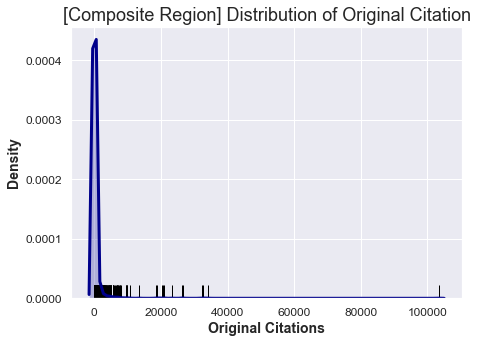

In [13]:
# fig = plt.figure(figsize=(15,8))
fig = plt.figure(figsize=(7,5))
sns.distplot(all_regions['est_cits'], hist = False, kde = True, rug = True, color = 'darkblue', 
             kde_kws = {'shade': True, 'linewidth': 3},
             rug_kws={'color': 'black'})

plt.xlabel('Original Citations')
plt.ylabel('Density')
plt.title('[Composite Region] Distribution of Original Citation')

fig.savefig('../images/OrgCitation_Distribution_AllRegions', dpi=300)

- New Citation of 3 regions

- Original Citation each region

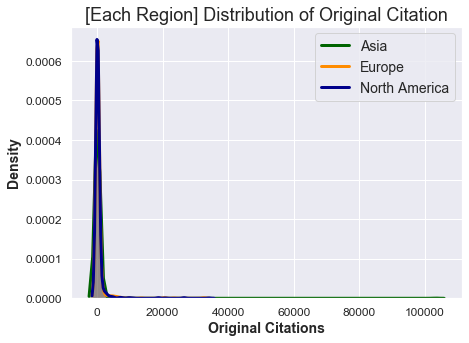

In [10]:
# fig = plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(7,5))
sns.distplot(asia['est_cits'], hist = False, kde = True, color = 'darkgreen', 
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Asia')
sns.distplot(europe['est_cits'], hist = False, kde = True, color = 'darkorange',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Europe')
sns.distplot(north_america['est_cits'], hist = False, kde = True, color = 'darkblue',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'North America')

plt.xlabel('Original Citations')
plt.ylabel('Density')
plt.title('[Each Region] Distribution of Original Citation')

fig.savefig('../images/OrgCitation_Distribution_EachRegions', dpi=300)

(-5000, 20000)

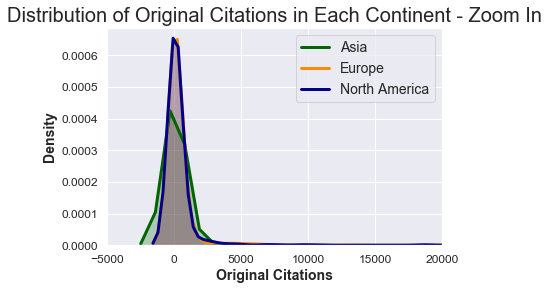

In [13]:
fig = plt.figure(figsize=(15,10))
sns.distplot(asia['est_cits'], hist = False, kde = True, color = 'darkgreen', 
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Asia')
sns.distplot(europe['est_cits'], hist = False, kde = True, color = 'darkorange',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Europe')
sns.distplot(north_america['est_cits'], hist = False, kde = True, color = 'darkblue',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'North America')

plt.xlabel('Original Citations')
plt.ylabel('Density')
plt.title('Distribution of Original Citations in Each Continent - Zoom In')

plt.xlim(-5000, 20000)

fig.savefig('../images/OrgCitation_Distribution_EachRegions_ZoomIn', dpi=300)

In [76]:
np.quantile(all_regions['est_cits'], [0.948, 0.99])

array([1007.092, 5781.26 ])

In [102]:
print(np.quantile(asia['est_cits'], [0.975, 0.99]))
print(np.quantile(europe['est_cits'], [0.933, 0.99]))
print(np.quantile(north_america['est_cits'], [0.937, 0.99]))

[1011.775 2028.86 ]
[1004.402 6737.14 ]
[1098.23 7151.8 ]


- Original Citation all fields

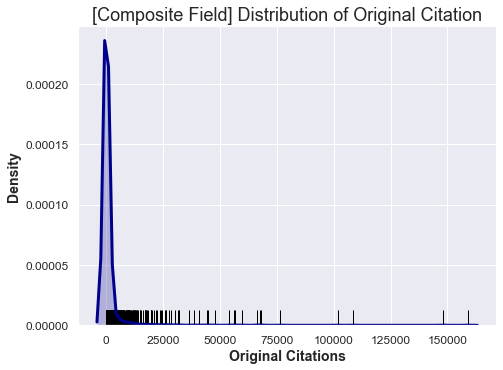

In [14]:
# fig = plt.figure(figsize=(15,8))
fig = plt.figure(figsize=(7.5,5.5))
sns.distplot(all_fields['est_cits'], hist = False, kde = True, rug = True, color = 'darkblue', 
             kde_kws = {'shade': True, 'linewidth': 3},
             rug_kws={'color': 'black'})

plt.xlabel('Original Citations')
plt.ylabel('Density')
plt.title('[Composite Field] Distribution of Original Citation')

fig.savefig('../images/OrgCitation_Distribution_AllFields', dpi=300)

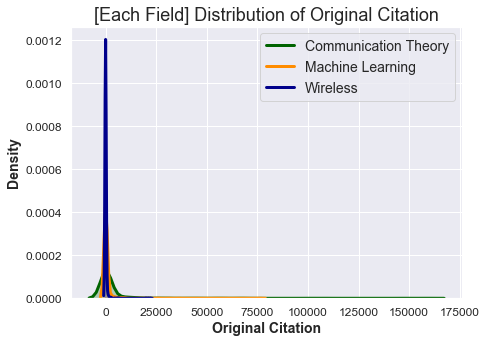

In [8]:
# fig = plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(7,5))
sns.distplot(ct['est_cits'], hist = False, kde = True, color = 'darkgreen', 
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Communication Theory')
sns.distplot(ml['est_cits'], hist = False, kde = True, color = 'darkorange',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Machine Learning')
sns.distplot(wl['est_cits'], hist = False, kde = True, color = 'darkblue',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Wireless')
plt.xlabel('Original Citation')
plt.ylabel('Density')
plt.title('[Each Field] Distribution of Original Citation')
fig.savefig('../images/OrgCitation_Distribution_EachField.png', dpi=300)

In [126]:
print(np.quantile(all_fields['est_cits'], [0.901, 0.99]))
print(np.quantile(wl['est_cits'], [0.976, 0.99]))
print(np.quantile(ml['est_cits'], [0.92, 0.99]))
print(np.quantile(ct['est_cits'], [0.806, 0.99]))

[ 1036.019 22327.04 ]
[1009.96 2412.15]
[1036.4  9169.89]
[ 1006.952 53961.77 ]


### 2. Differences in H-Index and Citation across Continents and Fields

#### 2.1. H-index

- **Boxplot**

In [19]:
# all_regions.sort_values(by=['org_h_index'], inplace=True)

# fig = plt.figure(figsize=(15,15))
# ax = sns.boxplot(x="bins_org_h_index", y="tech_h_index", data=all_regions, color=sns.color_palette("Blues")[4])
# plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 130, step=5))

# plt.xlabel('Original H-Index')
# plt.ylabel('New H-Index')
# plt.title('Original H-Index vs New H-Index (Excluded Survey and Magazine) in All Continents')
# fig.savefig('../images/Plot1', dpi=300)

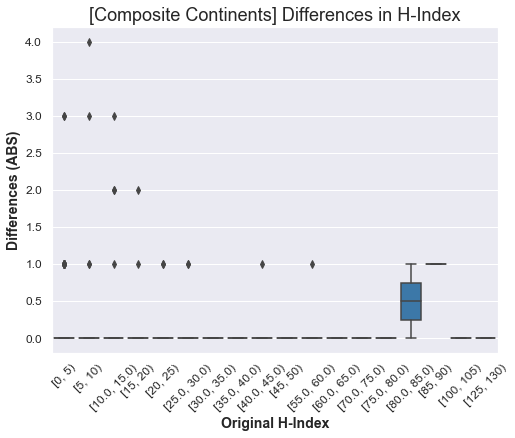

In [25]:
all_regions.sort_values(by=['org_h_index'], inplace=True)

# fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(8,6))
ax = sns.boxplot(x="bins_org_h_index", y="diff_tech_hindex", data=all_regions, color=sns.color_palette("Blues")[4])
plt.xticks(rotation=45)

plt.xlabel('Original H-Index')
plt.ylabel('Differences (ABS)')
plt.title('[Composite Continents] Differences in H-Index')
fig.savefig('../images/Plot1_Diff_Box', dpi=300)

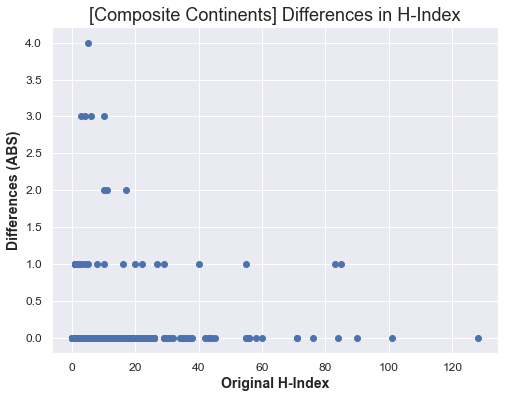

In [26]:
all_regions.sort_values(by=['org_h_index'], inplace=True)

# fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(8,6))
plt.scatter('org_h_index', 'diff_tech_hindex', data=all_regions)

plt.xlabel('Original H-Index')
plt.ylabel('Differences (ABS)')
plt.title('[Composite Continents] Differences in H-Index')
fig.savefig('../images/Plot1_Diff_Scatter', dpi=300)

In [20]:
# all_regions.sort_values(by=['org_h_index'], inplace=True)

# # fig = plt.figure(figsize=(15,15))
# ax = sns.boxplot(x="bins_org_h_index", y="tech_h_index", data=all_regions, hue='sampled_type')
# plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 130, step=5))

# plt.xlabel('Original H-Index')
# plt.ylabel('New H-Index')
# plt.title('Original H-Index vs New H-Index (Excluded Survey and Magazine) in Each Continent')

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, ['North America', 'Europe', 'Asia'])

# # fig.savefig('../images/Plot3', dpi=300)

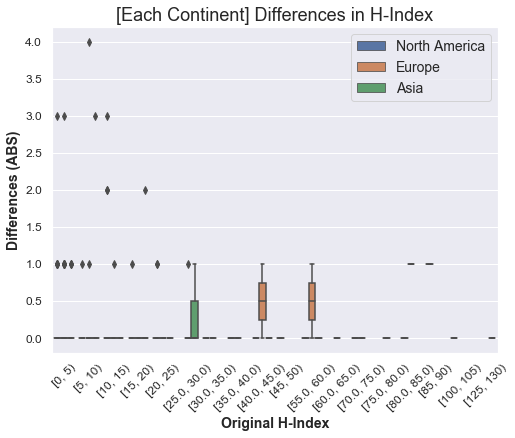

In [27]:
all_regions.sort_values(by=['org_h_index'], inplace=True)

# fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(8,6))
ax = sns.boxplot(x="bins_org_h_index", y="diff_tech_hindex", data=all_regions, hue='sampled_type')
plt.xticks(rotation=45)

plt.xlabel('Original H-Index')
plt.ylabel('Differences (ABS)')
plt.title('[Each Continent] Differences in H-Index')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['North America', 'Europe', 'Asia'])

fig.savefig('../images/Plot3_Diff_Box', dpi=300)

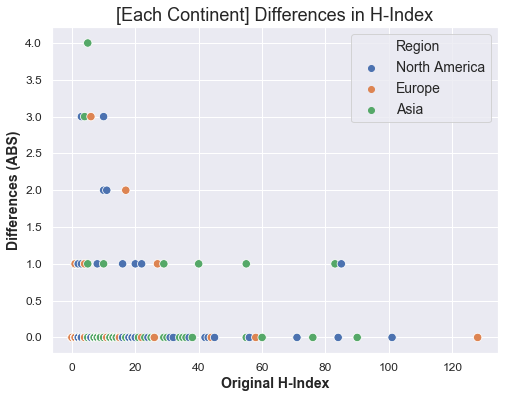

In [29]:
all_regions.sort_values(by=['org_h_index'], inplace=True)

# fig, ax = plt.subplots(figsize=(15,15))
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x='org_h_index', y='diff_tech_hindex', hue='sampled_type', data=all_regions, s=70)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Region', 'North America', 'Europe', 'Asia'])

plt.xlabel('Original H-Index')
plt.ylabel('Differences (ABS)')
plt.title('[Each Continent] Differences in H-Index')
fig.savefig('../images/Plot3_Diff_Scatter', dpi=300)

In [30]:
# all_regions.sort_values(by=['org_h_index'], inplace=True)

# # fig = plt.figure(figsize=(15,15))
# ax = sns.boxplot(x="bins_org_h_index", y="tech_h_index", data=all_regions[all_regions["org_h_index"]<55],
#                  hue='sampled_type')
# plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 130, step=5))

# plt.xlabel('Original H-Index')
# plt.ylabel('New H-Index')
# plt.title('[Zoom In] Original H-Index vs New H-Index (Excluded Survey and Magazine) in Each Continent')

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, ['North America', 'Europe', 'Asia'])

# plt.ylim(-10, 55)

# # fig.savefig('../images/Plot3_ZoomIn', dpi=300)

- **Scatter plot**

#### 2.2. Citation

- **Boxplot**

In [31]:
# all_regions.sort_values(by=['est_cits'], inplace=True)

# # fig = plt.figure(figsize=(15,15))
# ax = sns.boxplot(x="bins_est_cits", y="tech_est_cits", data=all_regions, color=sns.color_palette("Blues")[4])
# plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 105000, step=1000))
# plt.xlim(-1, 16)
# plt.ylim(-1000, 35000)

# plt.xlabel('Original Citations')
# plt.ylabel('New Citations')
# plt.title('Original Citations vs New Citations (Excluded Survey and Magazine) in All Continents')
# # fig.savefig('../images/Plot2', dpi=300)

In [32]:
all_regions.head(1)

,id,name,affiliation,sampled_type,pubs_count,est_cits,journal_pubs_count,conference_pubs_count,nontech_pubs_count,journal_est_cits,conference_est_cits,nontech_est_cits,org_h_index,tech_h_index,diff_tech_hindex,pdiff_tech_hindex,pdiff_tech_cits,bins_org_h_index,bins_est_cits,tech_est_cits
189,2478154117,Paul Crispen,University of Rochester,north_america_randoms,2,0,2,0,0,0,0,0,0,0,0,0.0,0.0,"[0, 5)","[0, 1000)",0


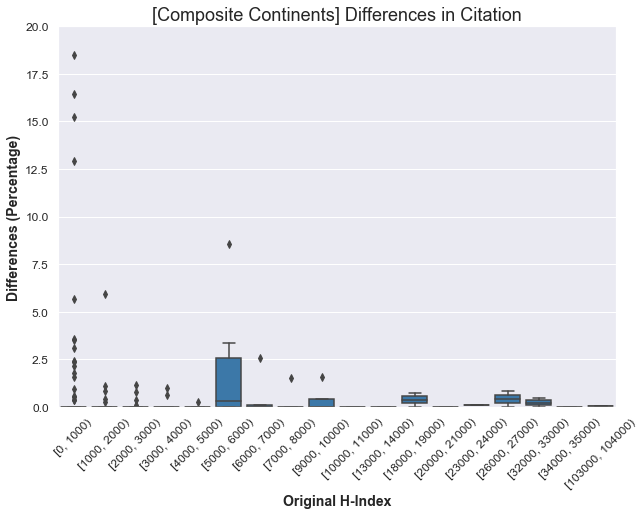

In [36]:
all_regions.sort_values(by=['est_cits'], inplace=True)

# fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(x="bins_est_cits", y="pdiff_tech_cits", data=all_regions, color=sns.color_palette("Blues")[4])
plt.xticks(rotation=45)
plt.ylim(0, 20)

plt.xlabel('Original H-Index')
plt.ylabel('Differences (Percentage)')
plt.title('[Composite Continents] Differences in Citation')
fig.savefig('../images/Plot2_Diff_Box', dpi=300)

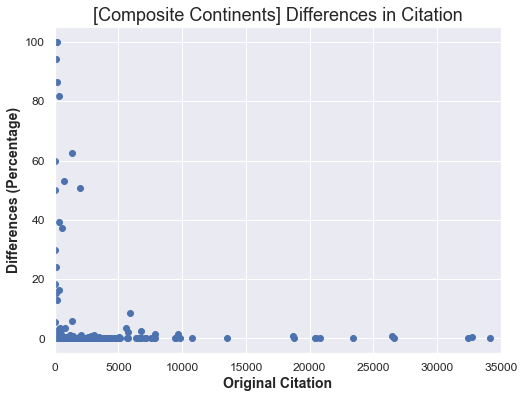

In [37]:
all_regions.sort_values(by=['est_cits'], inplace=True)

# fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(8,6))
plt.scatter('est_cits', 'pdiff_tech_cits', data=all_regions)

plt.xlim(-5, 35000)

plt.xlabel('Original Citation')
plt.ylabel('Differences (Percentage)')
plt.title('[Composite Continents] Differences in Citation')
fig.savefig('../images/Plot2_Diff_Scatter', dpi=300)

In [38]:
# all_regions.sort_values(by=['est_cits'], inplace=True)

# # fig = plt.figure(figsize=(15,15))
# ax = sns.boxplot(x="bins_est_cits", y="tech_est_cits", data=all_regions, hue='sampled_type')
# plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 105000, step=1000))
# plt.xlim(-1, 16)
# plt.ylim(-1000, 35000)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, ['North America', 'Europe', 'Asia'])

# plt.xlabel('Original Citations')
# plt.ylabel('New Citations')
# plt.title('Original Citations vs New Citations (Excluded Survey and Magazine) in Each Continent')
# # fig.savefig('../images/Plot4', dpi=300)

In [93]:
all_regions.head(1)

,id,name,affiliation,sampled_type,pubs_count,est_cits,journal_pubs_count,conference_pubs_count,nontech_pubs_count,journal_est_cits,conference_est_cits,nontech_est_cits,org_h_index,tech_h_index,diff_tech_hindex,pdiff_tech_hindex,pdiff_tech_cits,bins_org_h_index,bins_est_cits,tech_est_cits
189,2478154117,Paul Crispen,University of Rochester,north_america_randoms,2,0,2,0,0,0,0,0,0,0,0,0.0,0.0,"[0, 5)","[0, 1000)",0


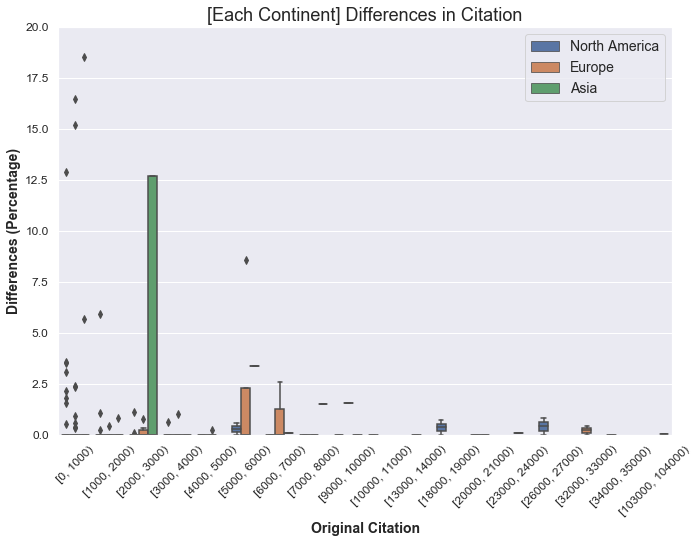

In [41]:
all_regions.sort_values(by=['est_cits'], inplace=True)

# fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(11,7.5))
ax = sns.boxplot(x="bins_est_cits", y="pdiff_tech_cits", data=all_regions, hue='sampled_type')
plt.xticks(rotation=45)
plt.ylim(0, 20)

plt.xlabel('Original Citation')
plt.ylabel('Differences (Percentage)')
plt.title('[Each Continent] Differences in Citation')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['North America', 'Europe', 'Asia'])

fig.savefig('../images/Plot4_Diff_Box', dpi=300)

In [42]:
# all_regions.sort_values(by=['est_cits'], inplace=True)

# # fig = plt.figure(figsize=(15,15))
# ax = sns.boxplot(x="bins_est_cits", y="tech_est_cits", data=all_regions, hue='sampled_type')
# plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 105000, step=1000))
# plt.xlim(-1, 9)
# plt.ylim(-1000, 10000)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, ['North America', 'Europe', 'Asia'])

# plt.xlabel('Original Citations')
# plt.ylabel('New Citations')
# plt.title('[Zoom In] Original Citations vs New Citations (Excluded Survey and Magazine) in Each Continent')
# # fig.savefig('../images/Plot4_ZoomIn', dpi=300)

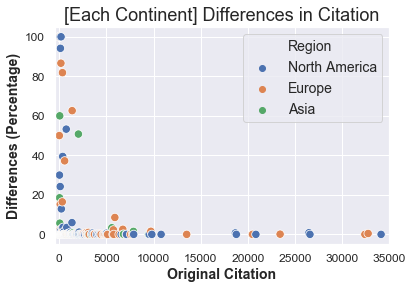

In [45]:
all_regions.sort_values(by=['est_cits'], inplace=True)

# fig, ax = plt.subplots(figsize=(15,15))
fig, ax = plt.subplots()

sns.scatterplot(x='est_cits', y='pdiff_tech_cits', hue='sampled_type', data=all_regions, s=70)

plt.xlim(-500, 35000)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Region', 'North America', 'Europe', 'Asia'])

plt.xlabel('Original Citation')
plt.ylabel('Differences (Percentage)')
plt.title('[Each Continent] Differences in Citation')
fig.savefig('../images/Plot4_Diff_Scatter', dpi=300)

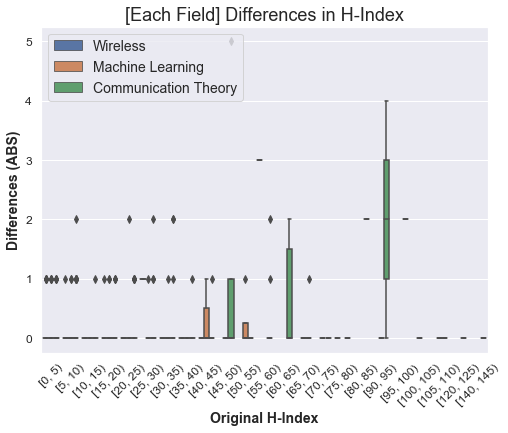

In [48]:
all_fields.sort_values(by=['org_h_index'], inplace=True)

# fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(8,6))
ax = sns.boxplot(x="bins_org_h_index", y="diff_tech_hindex", data=all_fields, hue='sampled_type')
plt.xticks(rotation=45)

plt.xlabel('Original H-Index')
plt.ylabel('Differences (ABS)')
plt.title('[Each Field] Differences in H-Index')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Wireless', 'Machine Learning', 'Communication Theory'])

fig.savefig('../images/Plot5_Diff_Box', dpi=300)

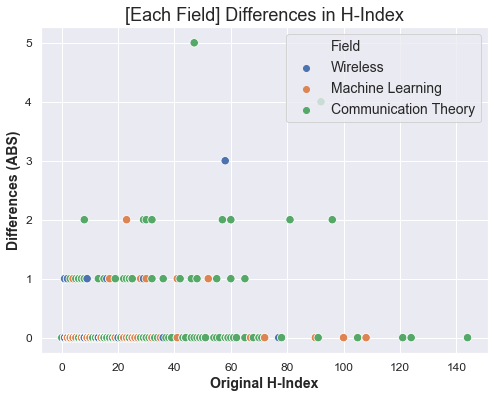

In [49]:
all_fields.sort_values(by=['org_h_index'], inplace=True)

# fig, ax = plt.subplots(figsize=(15,15))
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='org_h_index', y='diff_tech_hindex', hue='sampled_type', data=all_fields, s=70)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Field', 'Wireless', 'Machine Learning', 'Communication Theory'])

plt.xlabel('Original H-Index')
plt.ylabel('Differences (ABS)')
plt.title('[Each Field] Differences in H-Index')
fig.savefig('../images/Plot5_Diff_Scatter', dpi=300)

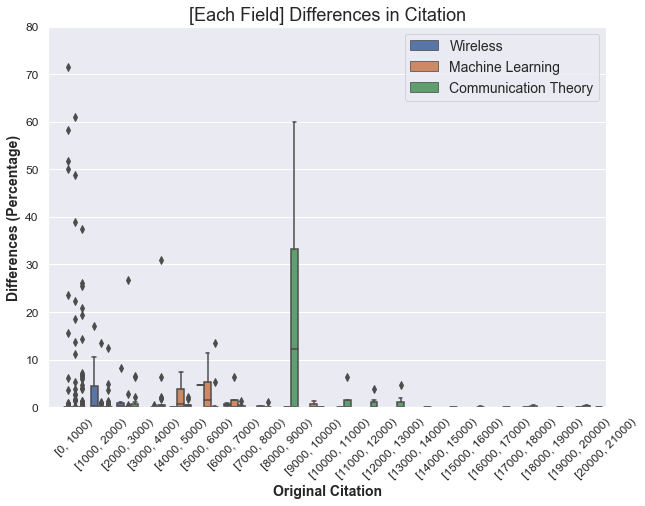

In [56]:
all_fields.sort_values(by=['est_cits'], inplace=True)

# fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(x="bins_est_cits", y="pdiff_tech_cits", data=all_fields, hue='sampled_type')
plt.xticks(rotation=45)

plt.xlim(-1, 20)
plt.ylim(0, 80)

plt.xlabel('Original Citation')
plt.ylabel('Differences (Percentage)')
plt.title('[Each Field] Differences in Citation')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Wireless', 'Machine Learning', 'Communication Theory'])

fig.savefig('../images/Plot6_Diff_Box', dpi=300)

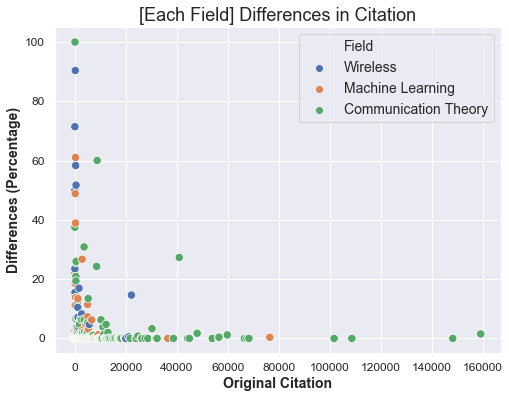

In [57]:
all_fields.sort_values(by=['est_cits'], inplace=True)

# fig, ax = plt.subplots(figsize=(15,15))
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x='est_cits', y='pdiff_tech_cits', hue='sampled_type', data=all_fields, s=70)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Field','Wireless', 'Machine Learning', 'Communication Theory'])

plt.xlabel('Original Citation')
plt.ylabel('Differences (Percentage)')
plt.title('[Each Field] Differences in Citation')
fig.savefig('../images/Plot6_Diff_Scatter', dpi=300)

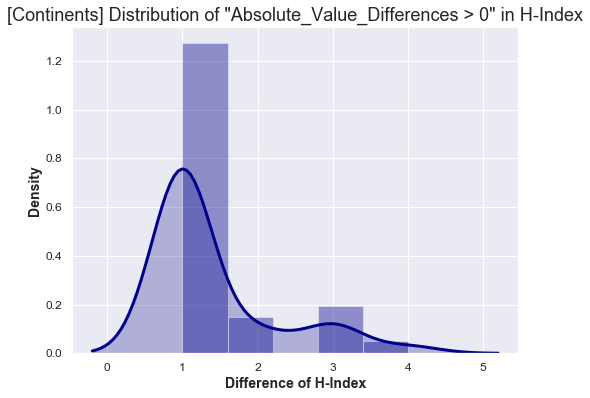

In [75]:
only_diff_all_regions = all_regions[(all_regions['diff_tech_hindex']>0)]

# fig = plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(8,6))
sns.distplot(only_diff_all_regions['diff_tech_hindex'], hist = True, kde = True, color = 'darkblue',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'All regions')

plt.xlabel('Difference of H-Index')
plt.ylabel('Density')
plt.title('[Continents] Distribution of "Absolute_Value_Differences > 0" in H-Index')
fig.savefig('../images/DiffHIndex_Distribution_AllRegions.png', dpi=300)

In [71]:
pd.DataFrame(only_diff_all_regions['sampled_type'].value_counts())

,sampled_type
europe_randoms,14
north_america_randoms,14
asia_randoms,6


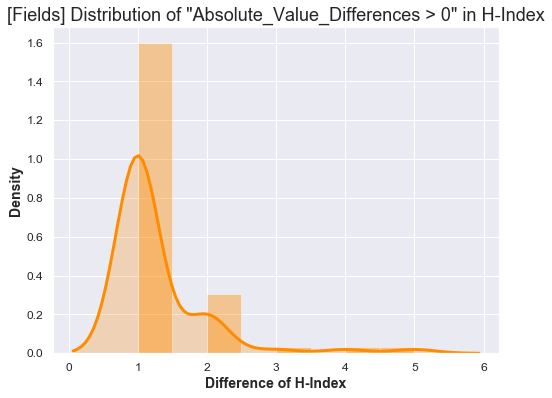

In [76]:
only_diff_all_fields = all_fields[(all_fields['diff_tech_hindex']>0)]

# fig = plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(8,6))

sns.distplot(only_diff_all_fields['diff_tech_hindex'], hist = True, kde = True, color = 'darkorange',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'All fields')

plt.xlabel('Difference of H-Index')
plt.ylabel('Density')
plt.title('[Fields] Distribution of "Absolute_Value_Differences > 0" in H-Index')
fig.savefig('../images/DiffHIndex_Distribution_AllFields.png', dpi=300)

In [58]:
pd.DataFrame(only_diff_all_fields['sampled_type'].value_counts())

,sampled_type
comtheo_randoms,42
ml_randoms,13
wireless_randoms,10


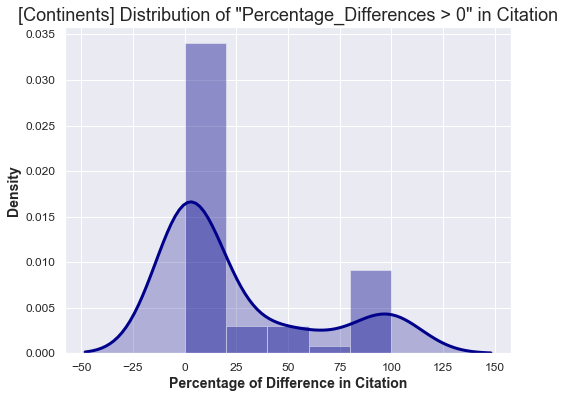

In [89]:
only_diff_all_regions = all_regions[(all_regions['pdiff_tech_cits']>0)]

# fig = plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(8,6))

sns.distplot(only_diff_all_regions['pdiff_tech_cits'], hist = True, kde = True, color = 'darkblue',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'All regions')

plt.xlabel('Percentage of Difference in Citation')
plt.ylabel('Density')
plt.title('[Continents] Distribution of "Percentage_Differences > 0" in Citation')
fig.savefig('../images/DiffCitation_Distribution_AllRegions.png', dpi=300)

In [81]:
only_diff_all_regions.shape

(66, 20)

In [79]:
pd.DataFrame(only_diff_all_regions['sampled_type'].value_counts())

,sampled_type
europe_randoms,30
north_america_randoms,26
asia_randoms,10


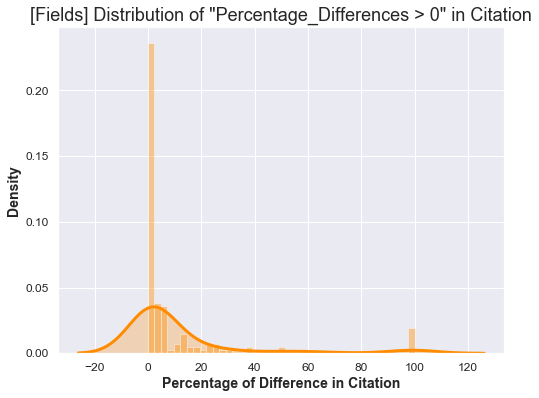

In [88]:
only_diff_all_fields = all_fields[(all_fields['pdiff_tech_cits']>0)]

# fig = plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(8,6))

sns.distplot(only_diff_all_fields['pdiff_tech_cits'], hist = True, kde = True, color = 'darkorange',
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'All fields')

plt.xlabel('Percentage of Difference in Citation')
plt.ylabel('Density')
plt.title('[Fields] Distribution of "Percentage_Differences > 0" in Citation')
fig.savefig('../images/DiffCitation_Distribution_AllFields.png', dpi=300)

In [84]:
pd.DataFrame(only_diff_all_fields['sampled_type'].value_counts())

,sampled_type
comtheo_randoms,96
ml_randoms,43
wireless_randoms,31


In [85]:
only_diff_all_fields.shape

(170, 22)

### ACTIVENESS/SPECIALIZED OF EACH FIELD

In [6]:
import plotly.graph_objects as go
import plotly.express as px

### H-Index

In [8]:
# ml.sort_values('org_h_index', ascending=False, inplace=True)
# ml['rank_hindex'] = range(1, ml.shape[0]+1)

# wl.sort_values('org_h_index', ascending=False, inplace=True)
# wl['rank_hindex'] = range(1, wl.shape[0]+1)

# ct.sort_values('org_h_index', ascending=False, inplace=True)
# ct['rank_hindex'] = range(1, ct.shape[0]+1)


# fig = go.Figure()
# # In machine learning field
# fig.add_trace(go.Scatter(name='[Machine Learning] Original H-Index', x=ml['rank_hindex'], y=ml['org_h_index'],
#                line = dict(width=2, dash='dot'), marker=dict(color='rgba(222,45,38,0.8)',)),)
# fig.add_trace(go.Scatter(name='[Machine Learning] In-field H-Index', x=ml['rank_hindex'], y=ml['infield_h_index'],
#                marker=dict(color='rgba(222,45,38,0.8)',)),)
# # In wireless field
# fig.add_trace(go.Scatter(name='[Wireless] Original H-Index', x=wl['rank_hindex'], y=wl['org_h_index'],
#                line = dict(width=2, dash='dot'), marker=dict(color='rgba(0,0,0,0.8)',)),)
# fig.add_trace(go.Scatter(name='[Wireless] In-field H-Index', x=wl['rank_hindex'], y=wl['infield_h_index'],
#                marker=dict(color='rgba(0,0,0,0.8)',)),)
# # In communication theory field
# fig.add_trace(go.Scatter(name='[ComTheo] Original H-Index', x=ct['rank_hindex'], y=ct['org_h_index'],
#                line = dict(width=2, dash='dot'), marker=dict(color='rgba(45,38,255,0.8)',)),)
# fig.add_trace(go.Scatter(name='[ComTheo] In-field H-Index', x=ct['rank_hindex'], y=ct['infield_h_index'],
#                marker=dict(color='rgba(45,38,255,0.8)',)),)

# # Set parameters for the plot
# fig.update_xaxes(title_text="<b>Random author each field (from high H-Index to low H-index)</b>")#, range=[0, 400])
# fig.update_yaxes(title_text="<b>H-Index</b>")#, range=[0, 60])
# fig.update_layout(title={'text': "<b>H-Index</b> vs <b>In-field H-Index</b> of random authors in each field",
#                                           'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
#                   autosize=False, width=1000,height=500,)
# fig.update_xaxes()
# fig.show()

### Publication

In [12]:
add_diff_col(ml, 'diff_infield_pubs', 'pubs_count', 'infield_pubs_count')
add_diff_col(wl, 'diff_infield_pubs', 'pubs_count', 'infield_pubs_count')
add_diff_col(ct, 'diff_infield_pubs', 'pubs_count', 'infield_pubs_count')

In [38]:
ml.sort_values('pubs_count', ascending=False, inplace=True)
ml['rank_pub'] = range(1, ml.shape[0]+1)

wl.sort_values('pubs_count', ascending=False, inplace=True)
wl['rank_pub'] = range(1, wl.shape[0]+1)

ct.sort_values('pubs_count', ascending=False, inplace=True)
ct['rank_pub'] = range(1, ct.shape[0]+1)

fig = go.Figure()
# In machine learning field
fig.add_trace(go.Scatter(name='Machine Learning', x=ml['rank_pub'], y=ml['diff_infield_pubs'],
               marker=dict(color='rgba(222,45,38,0.8)',)),)

# In wireless field
fig.add_trace(go.Scatter(name='Wireless', x=wl['rank_pub'], y=wl['diff_infield_pubs'],
               marker=dict(color='rgba(0,0,0,0.8)',)),)

# In communication theory field
fig.add_trace(go.Scatter(name='Communication Theory', x=ct['rank_pub'], y=ct['diff_infield_pubs'],
               marker=dict(color='rgba(45,38,255,0.8)',)),)

# Set parameters for the plot
fig.update_xaxes(title_text="<b>Random authors (from high Publication to low Publication)</b>", range=[0, 400])
fig.update_yaxes(title_text="<b>Absolute Value Differences</b>", range=[0, 900])
fig.update_layout(title={'text': "[Fields] <b>Differences</b> between <b>Publication</b> and <b>In-field Publication</b>",
                                          'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  autosize=False, width=1000,height=500,)
fig.update_xaxes()
fig.show()

In [39]:
# ml[['diff_infield_pubs', 'pubs_count', 'infield_pubs_count', 'rank_pub']].head(100).tail(60)

In [41]:
ml.head(1)

,id,name,affiliation,sampled_type,pubs_count,est_cits,journal_pubs_count,conference_pubs_count,nontech_pubs_count,journal_est_cits,conference_est_cits,nontech_est_cits,org_h_index,tech_h_index,infield_pubs_count,infield_est_cits,infield_h_index,diff_tech_hindex,pdiff_tech_hindex,pdiff_tech_cits,bins_org_h_index,bins_est_cits,rank_hindex,diff_infield_pubs,rank_pub
170,568280737,Leonard A. Jason,DePaul University,ml_randoms,812,17396,620,0,4,14860,0,22,67,67,1,4,1,0,0.0,0.126466,"[65, 70)","[17000, 18000)",5,811,1


In [42]:
add_diff_col(ml, 'diff_infield_cits', 'est_cits', 'infield_est_cits')
add_diff_col(wl, 'diff_infield_cits', 'est_cits', 'infield_est_cits')
add_diff_col(ct, 'diff_infield_cits', 'est_cits', 'infield_est_cits')

In [45]:
# ml[['est_cits','infield_est_cits','diff_infield_cits', 'rank_cit']].head(100).tail(60)

In [46]:
ml.sort_values('est_cits', ascending=False, inplace=True)
ml['rank_cit'] = range(1, ml.shape[0]+1)

wl.sort_values('est_cits', ascending=False, inplace=True)
wl['rank_cit'] = range(1, wl.shape[0]+1)

ct.sort_values('est_cits', ascending=False, inplace=True)
ct['rank_cit'] = range(1, ct.shape[0]+1)

fig = go.Figure()
# In machine learning field
fig.add_trace(go.Scatter(name='Machine Learning', x=ml['rank_cit'], y=ml['infield_est_cits'],
               marker=dict(color='rgba(222,45,38,0.8)',)),)

# In wireless field
fig.add_trace(go.Scatter(name='Wireless', x=wl['rank_cit'], y=wl['infield_est_cits'],
               marker=dict(color='rgba(0,0,0,0.8)',)),)

# In communication theory field
fig.add_trace(go.Scatter(name='Communication Theory', x=ct['rank_cit'], y=ct['infield_est_cits'],
               marker=dict(color='rgba(45,38,255,0.8)',)),)

# Set parameters for the plot
fig.update_xaxes(title_text="<b>Random authors (from high Citation to low Citation)</b>", range=[0, 400])
fig.update_yaxes(title_text="<b>Absolute Value Differences</b>", range=[0, 900])
fig.update_layout(title={'text': "[Fields] <b>Differences</b> between <b>Citation</b> and <b>In-field Citation</b>",
                                          'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  autosize=False, width=1000,height=500,)
fig.update_xaxes()
fig.show()

In [48]:
# ml.sort_values('est_cits', ascending=False, inplace=True)
# ml['rank_cits'] = range(1, ml.shape[0]+1)

# wl.sort_values('est_cits', ascending=False, inplace=True)
# wl['rank_cits'] = range(1, wl.shape[0]+1)

# ct.sort_values('est_cits', ascending=False, inplace=True)
# ct['rank_cits'] = range(1, ct.shape[0]+1)

fig = go.Figure()
# In machine learning field
fig.add_trace(go.Scatter(name='[Machine Learning] Original Citation', x=ml['rank_cit'], y=ml['est_cits'],
               line = dict(width=2, dash='dot'), marker=dict(color='rgba(222,45,38,0.8)',)),)
fig.add_trace(go.Scatter(name='[Machine Learning] In-field Citation', x=ml['rank_cit'], y=ml['infield_est_cits'],
               marker=dict(color='rgba(222,45,38,0.8)',)),)
# In wireless field
fig.add_trace(go.Scatter(name='[Wireless] Original Citation', x=wl['rank_cit'], y=wl['est_cits'],
               line = dict(width=2, dash='dot'), marker=dict(color='rgba(0,0,0,0.8)',)),)
fig.add_trace(go.Scatter(name='[Wireless] In-field Citation', x=wl['rank_cit'], y=wl['infield_est_cits'],
               marker=dict(color='rgba(0,0,0,0.8)',)),)
# In communication theory field
fig.add_trace(go.Scatter(name='[ComTheo] Original Citation', x=ct['rank_cit'], y=ct['est_cits'],
               line = dict(width=2, dash='dot'), marker=dict(color='rgba(45,38,255,0.8)',)),)
fig.add_trace(go.Scatter(name='[ComTheo] In-field Citation', x=ct['rank_cit'], y=ct['infield_est_cits'],
               marker=dict(color='rgba(45,38,255,0.8)',)),)

# Set parameters for the plot
fig.update_xaxes(title_text="<b>Random author each field (from high Citation to low Citation)</b>", range=[0, 200])
fig.update_yaxes(title_text="<b>Citation</b>", range=[0, 10000])
fig.update_layout(title={'text': "[Zoom In] <b>Citation</b> vs <b>In-field Citation</b> of random authors in each field",
                                          'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  autosize=False, width=1000,height=500,)
fig.update_xaxes()
fig.show()